<a href="https://colab.research.google.com/github/Parul664/Red_Attack_MRI/blob/main/Red_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


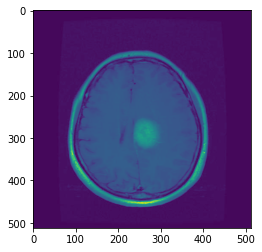

The size of the image is  (512, 512, 3)


In [ ]:

image = load_img('/content/drive/My Drive/classification/test/test1/2.jpg')
img = img_to_array(image)
plt.imshow(img[:,:,0])
plt.show()
print("The size of the image is ",np.shape(img))

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import Model


def model():
  input_tensor = Input(shape = (512,512,3))
  base_model = VGG16(weights='imagenet',include_top= False,input_tensor=input_tensor)

  top_model = Sequential()
  top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
  #top_model.add(BatchNormalization())
  top_model.add(Dense(512, activation='relu'))
  #top_model.add(BatchNormalization())
  top_model.add(Dropout(0.5))
  top_model.add(Dense(3, activation='softmax'))
  model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

  model.get_layer('block1_conv1').trainable = False
  model.get_layer('block1_conv2').trainable = False
  

  model.compile( optimizer = Adam(lr=1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model.summary()
  return model


In [ ]:
model = model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)    

In [ ]:
import os

class1 = '/content/drive/My Drive/classification/train/train1'
class2 = '/content/drive/My Drive/classification/train/train2'
class3 = '/content/drive/My Drive/classification/train/train3'

print("Images belonging to Class1 - Label = 0")
print(len([iq for iq in os.scandir(class1)]))
print("Images belonging to Class2 - Label = 1")
print(len([iq for iq in os.scandir(class2)]))
print("Images belonging to Class3 - Label = 2")
print(len([iq for iq in os.scandir(class3)]))

Images belonging to Class1 - Label = 0
566
Images belonging to Class2 - Label = 1
1140
Images belonging to Class3 - Label = 2
732


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_temp = [0 for i in range(566)] + [1 for i in range (1140)] + [2 for i in range (732)]
class_weights = compute_class_weight('balanced',[0,1,2],y_temp)


weights = {0:class_weights[0], 1:class_weights[1], 2:class_weights[2]}
print(weights)

{0: 1.4358068315665489, 1: 0.7128654970760234, 2: 1.110200364298725}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


seed = 9
batch_size = 2
target_size = (512,512)
train_dir = '/content/drive/My Drive/classification/train/'
test_dir = '/content/drive/My Drive/classification/test/'

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = target_size,
                                                    batch_size = batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    seed = seed,
                                                    shuffle = True)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = target_size,
                                                    batch_size = batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                   seed = seed)

Found 2438 images belonging to 3 classes.
Found 611 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'train1': 0, 'train2': 1, 'train3': 2}


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    epochs = 20,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight = weights 
                    )

Epoch 1/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.8657 - accuracy: 0.6042 - val_loss: 0.3424 - val_accuracy: 0.8475
Epoch 2/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.4881 - accuracy: 0.8039 - val_loss: 0.2861 - val_accuracy: 0.8885
Epoch 3/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.4167 - accuracy: 0.8388 - val_loss: 0.2293 - val_accuracy: 0.9033
Epoch 4/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.3383 - accuracy: 0.8712 - val_loss: 0.1836 - val_accuracy: 0.9295
Epoch 5/20
1219/1219 [==============================] - 218s 179ms/step - loss: 0.2809 - accuracy: 0.8946 - val_loss: 0.1947 - val_accuracy: 0.9197
Epoch 6/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.2293 - accuracy: 0.9180 - val_loss: 0.1264 - val_accuracy: 0.9426
Epoch 7/20
1219/1219 [==============================] - 217s 178ms/step - loss: 0.1673 - accuracy: 0.9409 - val_

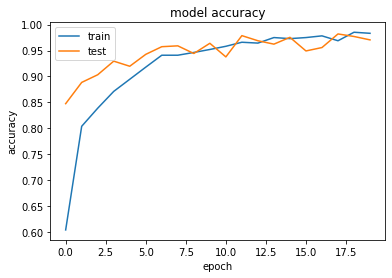

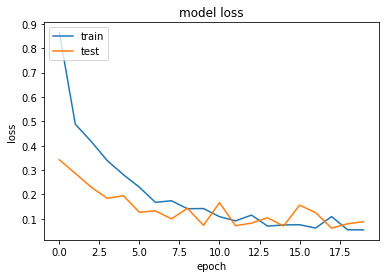

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/My Drive/classification_weighted_full_retrained.h5")

In [ ]:
from keras import models
new_model = models.load_model("/content/drive/My Drive/classification_weighted_full_retrained.h5")

In [ ]:
from PIL import Image
import os
import tensorflow as tf



def prepare_test_dataset(train_dir_img):
    test_x = []
    for file_name in os.listdir(train_dir_img):
        full_loc = os.path.join(train_dir_img,file_name)
        #print(file_name)
        img = Image.open(full_loc)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img/255
        img = np.repeat(img, 3, 2)
        test_x.append(img)
        
        
    test_x = np.asarray(test_x)
    return test_x
        
def per_class_count(y_pred):
    c_1,c_2,c_3 = 0,0,0
    for i,j,k in y_pred:
        if (i>j and i>k):
            c_1+=1
        elif (j>i and j>k):
            c_2+=1
        else :
            c_3+=1
    return (c_1,c_2,c_3)

In [ ]:
train_dir_img='/content/drive/My Drive/classification/test/test2'
x1 = prepare_test_dataset(train_dir_img)
y_pred1 = new_model.predict(x1)
(c_1,c_2,c_3) = per_class_count(y_pred1)
print(c_1,c_2,c_3)

3 283 0


In [ ]:

train_dir_img='/content/drive/My Drive/classification/test/test3'
x2 = prepare_test_dataset(train_dir_img)
y_pred2 = new_model.predict(x2)
(c_1,c_2,c_3) = per_class_count(y_pred2)
print(c_1,c_2,c_3)

0 6 177


In [ ]:
train_dir_img='/content/drive/My Drive/classification/test/test1'
x3 = prepare_test_dataset(train_dir_img)
y_pred3 = new_model.predict(x3)
(c_1,c_2,c_3) = per_class_count(y_pred3)
print(c_1,c_2,c_3)


133 8 1


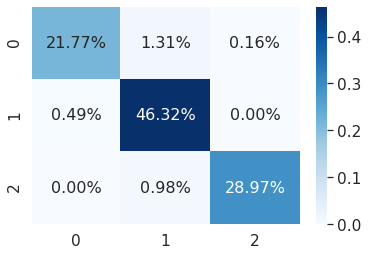

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn
import pandas as pd

y_test_pred_total = np.concatenate((y_pred3,y_pred1,y_pred2),0)
y_test_pred_total = y_test_pred_total.argmax(axis=1)
y_test_true_total = np.array(([0 for i in range(np.shape(x3)[0])] + [1 for i in range(np.shape(x1)[0])] + [2 for i in range(np.shape(x2)[0])]))

cm = confusion_matrix(y_true = y_test_true_total,y_pred = y_test_pred_total)
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm/np.sum(cm), annot=True,fmt = '.2%',cmap = 'Blues', annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
from keras import models
new_model = models.load_model("/content/drive/My Drive/classification_weighted_full_retrained.h5")

## **Implementation of the Red Attack**

**Boundary Estimation**

In [ ]:
def diff(img1, img2):
    return np.amax(img1-img2)

def pred(img):
    img = img/255.0
    img = np.repeat(img, 3, 2)
    imgt = []
    imgt.append(img)
    pred = new_model.predict(np.asarray(imgt))
    return pred[0].argmax()

def boundary_estimation(source,target, delta_min):
    print("Boundary Estimation")
    adv = (source+target)/2
    delta = diff(source, target)
    k = pred(adv)
    left = source
    right = target
    while delta > delta_min:
        if pred(source) != k:
            right = adv
        else:
            left = adv
        adv = (left+right)/2.0
        k = pred(adv)
        delta = diff(left, right)
    return right


**Boundary Estimation Check**

In [ ]:
#target image from class 1 to class 2
source_fold = '/content/drive/My Drive/classification/train/train1/535.jpg' #534
target_fold = '/content/drive/My Drive/classification/train/train2/194.jpg'


[]

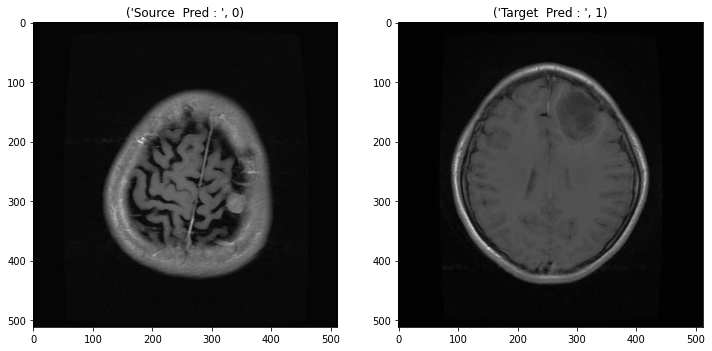

In [ ]:
source = Image.open(source_fold)
source = tf.keras.preprocessing.image.img_to_array(source)
target = Image.open(target_fold)
target = tf.keras.preprocessing.image.img_to_array(target)

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 6)
ax1.imshow(source[:,:,0],cmap = "gray")
ax1.set_title(("Source  Pred : ",pred(source)))
ax2.imshow(target[:,:,0],cmap = "gray")
ax2.set_title(("Target  Pred : ",pred(target)))
plt.plot()

Predicted Value :  1


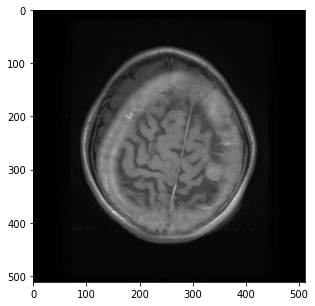

In [ ]:
neww = boundary_estimation(source,target,0.1)
plt.figure(figsize=(5,5))
plt.imshow(neww[:,:,0],cmap = 'gray')
plt.plot()
print("Predicted Value : ",(pred(neww)))

**Gradient Estimation**

In [ ]:
def go_out(source,iout,alpha):
    print("go out")
    i_diff = iout - source
    pred_source = pred(source)
    inew = iout
    while (pred(inew)==pred_source):
        #print("yay")
        inew = inew + alpha*(i_diff)
        
    return inew

def array_diff(A):
  return (A*A).sum()

def Gradient_estimation(source, target,adv,n,theta):
    print("Gradient Estimation")
    Io = np.zeros((262144))
    X = np.random.randint(0,262144,size = n)
    for i in X:
        Io[i] = 255
    Io = Io.reshape((512,512,1))
    Ii2 = adv + theta*Io
    print(pred(source),pred(adv),pred(Ii2))
    Ii2 = go_out(source,Ii2,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    Ii2_new = boundary_estimation(source,Ii2,1.0)
    #comment lower line for original
    Ii2_new = go_out(source,Ii2_new,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    d2 = array_diff(Ii2_new - source)
    d1 = array_diff(adv - source)
    if d2 > d1:
      return (-1,Ii2_new)
    elif d1 > d2:
      return (1,Ii2_new)
    else:
      return (0,Ii2_new)



**Gradient Estimation Testing**

0 1 0
yay
0 1 1
0 1 1
-1


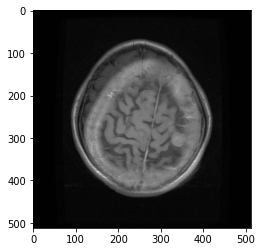

In [ ]:
(a,b) = Gradient_estimation(source,target,neww,5,0.196)
print(a)
plt.imshow(b[:,:,0],cmap = "gray")


**Efficient Update**

In [ ]:
def efficient_update(source, target, adv, I2, g, j):
    print("efficient update")
    delta = g*(I2 - adv)
    jump = j
    Inew = adv + jump*delta
    Inew = go_out(source,Inew,0.01)
    d1 = array_diff(Inew - source)
    d2 = array_diff(adv - source)
    flag, it = 0,0
    while d1 > d2:
        jump = (jump/2.0)
        Inew = adv + jump*delta
        if(pred(Inew)==pred(source)):
            Inew = go_out(source,Inew,0.01)
        it = it + 1
        d1 = array_diff(Inew-source)
        if it > 100:
            break
    if d1 > d2:
        flag = 1
        print("flag is : ",flag)
        Inew = adv
    return Inew   

In [ ]:
def iteration(itr, source, target, n, theta, j, dmin):
    targett = target
    sourcee = source
    for i in range(itr):
        print("iteration",i)
        adversarial_image = boundary_estimation(sourcee, targett, dmin)
        adversarial_image = go_out(sourcee,adversarial_image,0.01)
        (g, Iii2) = Gradient_estimation(sourcee, targett, targett, n, theta)
        targett = efficient_update(sourcee, targett, adversarial_image, Iii2, g, j)
        
        if (pred(targett) == pred(source)):
            j = j/2.0
        fin = targett
        print("array_diff(fin-sourcee)",array_diff(fin-sourcee))
        if(pred(targett)==pred(sourcee)):
            fin = go_out(sourcee,targett,0.01)
        if(array_diff(fin-sourcee)<array_diff(adversarial_image-sourcee)):
            targett = fin
            #print("uopp")
    
    return fin

In [ ]:
final = iteration(100,source,target,5,0.196,5.0,1.0)

iteration 0
Boundary Estimation
go out
Gradient Estimation
0 1 1
go out
0 1 1
Boundary Estimation
go out
0 1 1
efficient update
go out
go out
array_diff(fin-sourcee) 47896055.43408168
iteration 1
Boundary Estimation
go out
Gradient Estimation
0 1 0
go out
0 1 1
Boundary Estimation
go out
0 1 1
efficient update
go out
array_diff(fin-sourcee) 44337874.568907425
iteration 2
Boundary Estimation
go out
Gradient Estimation
0 1 0
go out
0 1 1
Boundary Estimation
go out
0 1 1
efficient update
go out
array_diff(fin-sourcee) 43832758.20794569
iteration 3
Boundary Estimation
go out
Gradient Estimation
0 1 1
go out
0 1 1
Boundary Estimation
go out
0 1 1
efficient update
go out
array_diff(fin-sourcee) 43275218.57147339
iteration 4
Boundary Estimation
go out
Gradient Estimation
0 1 1
go out
0 1 1
Boundary Estimation
go out
0 1 1
efficient update
go out
go out
go out
array_diff(fin-sourcee) 42937791.253815584
iteration 5
Boundary Estimation
go out
Gradient Estimation
0 1 0
go out
0 1 1
Boundary Estim

Result After 10 iterations:

0

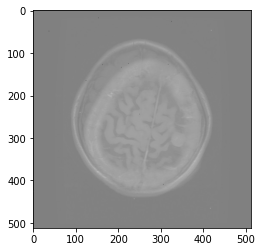

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray")
pred(source)

Result After 100 iterations:

Original Image label :  0
Perturbed Image label :  1


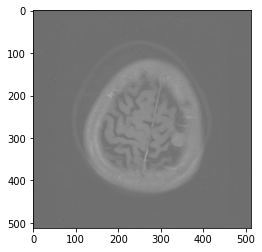

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray")
print("Original Image label : ", pred(source))
print("Perturbed Image label : ",pred(final))

In [ ]:
from skimage import measure
s = measure.compare_ssim(source,final,multichannel=True)
print(s)

0.8361162940557175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


Testing on another image

[]

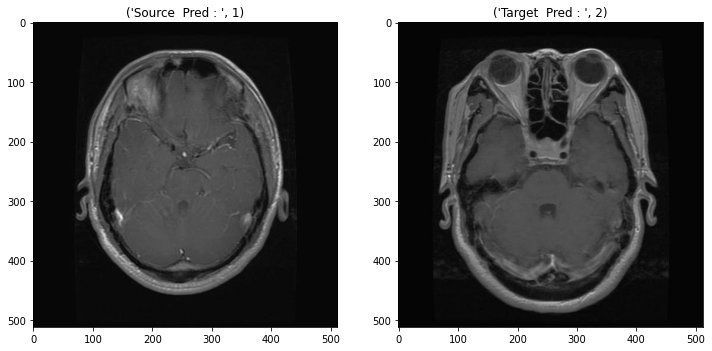

In [ ]:
from PIL import Image
import os
import tensorflow as tf

source_fold2 = '/content/drive/My Drive/classification/train/train2/2.jpg' #534
target_fold2 = '/content/drive/My Drive/classification/train/train3/7.jpg'
source2 = Image.open(source_fold2)
source2 = tf.keras.preprocessing.image.img_to_array(source2)
target2 = Image.open(target_fold2)
target2 = tf.keras.preprocessing.image.img_to_array(target2)

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 6)
ax1.imshow(source2[:,:,0],cmap = "gray")
ax1.set_title(("Source  Pred : ",pred(source2)))
ax2.imshow(target2[:,:,0],cmap = "gray")
ax2.set_title(("Target  Pred : ",pred(target2)))
plt.plot()

In [ ]:
final2 = iteration(100,source2,target2,5,0.196,5.0,1.0)

iteration 0
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 2
efficient update
go out
flag is :  1
array_diff(fin-sourcee) 79710750.0
iteration 1
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 2
efficient update
go out
array_diff(fin-sourcee) 76938499.32462172
iteration 2
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 2
efficient update
go out
array_diff(fin-sourcee) 76937694.34093884
iteration 3
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 2
efficient update
go out
array_diff(fin-sourcee) 76937694.34093884
iteration 4
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 2
efficient update
go out
array_diff(fin-sourcee) 74232386.90949719
iteration 5
Boundary Estimation
go out
Gradient Estimation
1 2 2
go out
1 2 2
Boundary Estimation
go out
1 2 

After 100 iterations for image 2

Original Image label :  1
Perturbed Image label :  2


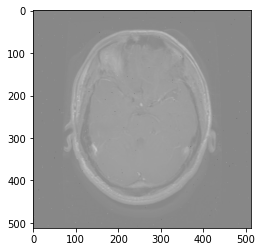

In [ ]:
plt.imshow(final2[:,:,0],cmap = "gray")
print("Original Image label : ", pred(source2))
print("Perturbed Image label : ",pred(final2))

In [ ]:
from skimage import measure
s = measure.compare_ssim(source2,final2,multichannel=True)
print(s)

0.796729784917677


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


In [ ]:
def max_diff(img1,img2):
    img = img1 - img2
    return np.amax(img)

def pred(img):
    img = img/255.0
    img = np.repeat(img, 3, 2)
    imgt = []
    imgt.append(img)
    pred = new_model.predict(np.asarray(imgt))
    return pred[0].argmax()

def boundary_estimation(source, target, dmin):
    print("boundary_estimation")
    Ii = ((source + target)/2.0)
    k = pred(Ii)
    delta = max_diff(source, Ii)
    Ia2 = source
    Ib2 = target
    p = Ib2
    while (delta > dmin):
        if (pred(Ia2) != k):
            Ib2 = Ii
        else:
            Ia2 = Ii
        Ii = ((Ia2+Ib2)/2.0)
        k = pred(Ii)
        delta = max_diff(Ia2,Ii)  
    return Ii

def go_out(source,iout,alpha):
    print("go_out")
    i_diff = iout - source
    pred_source = pred(source)
    inew = iout
    while (pred(inew)==pred_source):
        inew = inew + alpha*(i_diff)
        
    return inew

def array_diff(d1):
    sumd1 = 0.0
    for i in range(0,1):
        for j in range(0,512):
            for k in range(0,512):
                d1[j][k][i] = d1[j][k][i]*d1[j][k][i]
                sumd1 = sumd1 + d1[j][k][i]
    return (sumd1)

def gradient_estimation(source, target, adversarial, n, theta):
    print("gradient_estimation")
    Ia = source
    Ib = target
    Ii = adversarial
    Io = np.zeros((262144))
    X = np.random.randint(0,262144, size=n)
    for i in X:
        Io[i] = 255
    Io = Io.reshape((512,512,1))
#     print(Io*theta)
    Ii2 = Ii + theta*Io
    Ii2_new = boundary_estimation(Ia, Ii2, 1.0)
    Ii2_new = go_out(source,Ii2_new,0.01)
    diff2 = Ii2_new - Ia
    diff1 = Ii - Ia
    d2 = array_diff(diff2)
    d1 = array_diff(diff1)
    if (d2 > d1):
        return (-1, Ii2_new)
    elif (d1 > d2):
        return (1, Ii2_new)
    else:
        return (0,Ii2_new)

def efficient_update(source, target, adversarial, I2, g, j):
    print("efficient_update")
    Ia = source
    Ib = target
    Ii = adversarial
    Ii2 = I2
    delta = g*(Ii2 - Ii)
    l = j
    Inew = Ii + l*delta
    
    diff1 = Inew - Ia
    diff2 = Ii - Ia
    d1 = array_diff(diff1)
    d2 = array_diff(diff2)
    ii = 0
    it = 0
    while(d1 > d2):
        l = (l/2.0)
        Inew = Ii + l*delta
        if(pred(Inew)==pred(source)):
            Inew = go_out(source,Inew,0.01)
        it = it + 1
        d1 = array_diff(Inew-Ia)
        if(it>100):
            break
    if (d1 > d2):
        print(ii)
        ii = ii + 1
        Inew = Ii
    return Inew    

def iteration(itr, source, target, n, theta, j, dmin):
    targett = target
    sourcee = source
    for i in range(itr):
        print (i)
        adversarial_image = boundary_estimation(sourcee, targett, dmin)
        adversarial_image = go_out(sourcee,adversarial_image,0.01)
        (g, Iii2) = gradient_estimation(sourcee, targett, targett, n, theta)
        targett = efficient_update(sourcee, targett, adversarial_image, Iii2, g, j)
        if (pred(targett) == pred(source)):
            j = j/2.0
        fin = targett
        print(array_diff(fin-sourcee))
        if(pred(targett)==pred(sourcee)):
            fin = go_out(sourcee,targett,0.01)
        if(array_diff(fin-sourcee)<array_diff(adversarial_image-sourcee)):
            targett = fin
            #print("uopp")
    
    return fin

final = iteration(1000,source,target,5,0.196,5.0,1.0)

NameError: ignored

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray")
pred(final)